# Train Classifier and get layer activations for training and test data

In [1]:
import os, pathlib

file_path = os.path.dirname(os.path.realpath("__file__"))
home_dir = pathlib.Path(file_path).parent.parent.parent
os.chdir(home_dir)
os.getcwd()

'/home/tom/Uni_Dev'

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras

from src.common import save_layer_activations
from src.fashion_mnist.data import get_fashion_mnist_train_test, get_fashion_mnist_labels_categorical
from src.models import get_classifier_model_compiled
from src.fashion_mnist.file_names import SAVED_CLASSIFIER_PATH

tf.random.set_seed(1234)
print(tf.__version__)
print(np.__version__)
print(keras)

train_images, test_images = get_fashion_mnist_train_test()
train_labels_c, test_labels_c = get_fashion_mnist_labels_categorical()

2.9.1
1.22.4
<module 'keras.api._v2.keras' from '/home/tom/.local/share/virtualenvs/cladec-mnist-KzwMDeQR/lib/python3.10/site-packages/keras/api/_v2/keras/__init__.py'>


# Train a classifier on MNIST and save the model

In [3]:
model = get_classifier_model_compiled()
model.summary()

2022-06-03 10:02:13.355525: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-03 10:02:13.403644: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-03 10:02:13.403966: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-03 10:02:13.405079: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 64)       256       
 hNormalization)                                                 
                                                        

In [4]:
history = model.fit(train_images, train_labels_c, epochs=15)

2022-06-03 10:02:15.330351: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.
2022-06-03 10:02:15.683482: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/15


2022-06-03 10:02:17.287599: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8303


1875/1875 [==============================] - 16s 7ms/step - loss: 0.4258 - categorical_accuracy: 0.8479
Epoch 2/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2938 - categorical_accuracy: 0.8924
Epoch 3/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2609 - categorical_accuracy: 0.9041
Epoch 4/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2377 - categorical_accuracy: 0.9116
Epoch 5/15
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2201 - categorical_accuracy: 0.9177
Epoch 6/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2051 - categorical_accuracy: 0.9233
Epoch 7/15
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1955 - categorical_accuracy: 0.9286
Epoch 8/15
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1794 - categorical_accuracy: 0.9322
Epoch 9/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1742 - categ

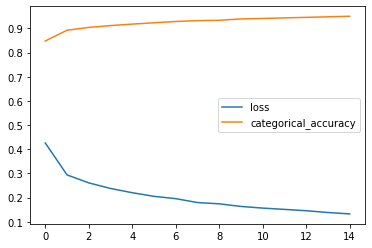

In [5]:
for k, vs in history.history.items():
    plt.plot(vs, label=k)
plt.legend()
plt.show()

In [6]:
model.evaluate(test_images, test_labels_c)

313/313 [==============================] - 2s 4ms/step - loss: 0.2431 - categorical_accuracy: 0.9185


[0.24305014312267303, 0.9185000061988831]

In [7]:
model.save(SAVED_CLASSIFIER_PATH)

INFO:tensorflow:Assets written to: /home/tom/Uni_Dev/cladec-mnist/saved-models/fashion_mnist/classifier/assets


INFO:tensorflow:Assets written to: /home/tom/Uni_Dev/cladec-mnist/saved-models/fashion_mnist/classifier/assets


# Get Activations for train and test images

https://keras.io/getting_started/faq/#how-can-i-obtain-the-output-of-an-intermediate-layer-feature-extraction

## 128 Neuron Dense Layer

In [10]:
layer_name = 'dense'
dense_path = SAVED_CLASSIFIER_PATH.joinpath('dense')
save_layer_activations(dense_path, model, layer_name, test_images, train_images)

# Last Convolutional Layer

In [11]:
conv_path = SAVED_CLASSIFIER_PATH.joinpath('conv')
layer_name = 'max_pooling2d_1'
save_layer_activations(conv_path, model, layer_name, test_images, train_images)